In [1]:
# imports
from tensorflow import keras
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from matplotlib import pyplot
from scipy import stats, optimize, interpolate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from time import time
from sklearn import svm
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
def plot_matrix(grid):
    titles_options = [("Confusion matrix, without normalization", None),]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(grid, X_test, y_test,

                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

    plt.show()

In [3]:
# load a single file as a numpy array
from pandas import read_csv
def load_file(filepath):
    columns = ['meanX', 'meanY', 'meanZ', 'rmsX', 'rmsY', 'rmsZ','stddevX', 'stddevY', 'stddevZ', 'maxX', 'maxY', 'maxZ', 'minX', 'minY', 'minZ', 'powerX', 'powerY', 'powerZ','skewX', 'skewY', 'skewZ', 'kurtosisX', 'kurtosisY', 'kurtosisZ','meanabsdevX', 'meanabsdevY', 'meanabsdevZ', 'energyX', 'energyY', 'energyZ', 'bandpowerX','bandpowerY', 'bandpowerZ', 'maxfreqX', 'maxfreqY', 'maxfreqZ', 'minfreqX', 'minfreqY', 'minfreqZ', 'meanfreqX', 'meanfreqY', 'meanfreqZ', 'surface']
    dataframe = read_csv(filepath,header=None, names=columns)
    return dataframe
df = load_file('feature_engineering.csv')
df

# Encode Labels
label = LabelEncoder()
df['label'] = label.fit_transform(df['surface'])
df.head()
label.classes_

# Standardize Data
X = df[['meanX', 'meanY', 'meanZ', 'rmsX', 'rmsY', 'rmsZ','stddevX', 'stddevY', 'stddevZ', 'maxX', 'maxY', 'maxZ', 'minX', 'minY', 'minZ', 'powerX', 'powerY', 'powerZ','skewX', 'skewY', 'skewZ', 'kurtosisX', 'kurtosisY', 'kurtosisZ','meanabsdevX', 'meanabsdevY', 'meanabsdevZ', 'energyX', 'energyY', 'energyZ', 'bandpowerX','bandpowerY', 'bandpowerZ', 'maxfreqX', 'maxfreqY', 'maxfreqZ', 'minfreqX', 'minfreqY', 'minfreqZ', 'meanfreqX', 'meanfreqY', 'meanfreqZ']]
y = df['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(data = X, columns = ['meanX', 'meanY', 'meanZ', 'rmsX', 'rmsY', 'rmsZ','stddevX', 'stddevY', 'stddevZ', 'maxX', 'maxY', 'maxZ', 'minX', 'minY', 'minZ', 'powerX', 'powerY', 'powerZ','skewX', 'skewY', 'skewZ', 'kurtosisX', 'kurtosisY', 'kurtosisZ','meanabsdevX', 'meanabsdevY', 'meanabsdevZ', 'energyX', 'energyY', 'energyZ', 'bandpowerX','bandpowerY', 'bandpowerZ', 'maxfreqX', 'maxfreqY', 'maxfreqZ', 'minfreqX', 'minfreqY', 'minfreqZ', 'meanfreqX', 'meanfreqY', 'meanfreqZ'])
scaled_X['label'] = y.values
scaled_X


,meanX,meanY,meanZ,rmsX,rmsY,rmsZ,stddevX,stddevY,stddevZ,maxX,...,maxfreqX,maxfreqY,maxfreqZ,minfreqX,minfreqY,minfreqZ,meanfreqX,meanfreqY,meanfreqZ,label
0,0.319993,-1.704225,0.907880,0.104500,-0.592168,-0.476993,-0.477694,-0.242620,-0.469947,0.022855,...,0.319993,-1.685132,-0.575008,-0.279896,-0.479851,0.192534,-0.330788,-0.509992,-0.437332,3
1,0.169987,-0.668922,-0.625326,-0.113354,-0.702451,-0.881434,-0.860134,-0.840008,-0.876903,-0.289105,...,0.169987,-0.669504,-0.917756,-0.652867,-0.934042,-0.188208,-0.762443,-0.829606,-0.847816,3
2,0.131711,-0.904340,-1.227881,-0.141863,-0.778052,-0.810134,-0.804861,-0.805831,-0.817999,-0.155408,...,0.131711,-0.905048,-0.928416,-1.286922,-0.691033,-0.040029,-0.702414,-0.823740,-0.804412,3
3,0.233356,-0.927626,0.649590,-0.015786,-0.819199,-1.190660,-0.661269,-0.855784,-1.179487,-0.383807,...,0.233356,-0.928346,-0.935910,0.840351,-0.572557,-0.496690,-0.617142,-0.851537,-1.209799,3
4,0.279226,-0.527257,2.197493,0.015086,-0.638144,-0.863547,-0.741056,-0.834896,-0.885320,-0.188832,...,0.279226,-0.527763,-1.033950,-0.753515,-1.097807,-0.765814,-0.656102,-0.794136,-0.872859,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,-0.815932,0.824723,-0.017025,-0.890241,-0.676027,-0.964820,-0.645063,-0.808794,-0.947352,-0.769962,...,-0.815932,0.835042,-0.943609,-0.183917,-0.836170,0.433650,-0.751905,-0.862338,-0.955442,4
316,-0.372513,0.874970,-0.932155,-0.603784,-0.655932,-0.811055,-0.663584,-0.923356,-0.803092,-0.597768,...,-0.372513,0.913271,-0.820302,-1.040229,-0.092806,-0.375907,-0.782525,-0.886976,-0.772643,4
317,0.349029,0.993195,-0.334230,-0.128741,-0.233705,-0.725762,-0.673163,-0.776049,-0.708981,-0.527124,...,0.349029,1.097334,-0.311973,0.218188,-0.572808,-0.068944,-0.567707,-0.725616,-0.769302,4
318,0.058471,0.777418,1.382356,-0.356490,-0.835721,-0.737409,-0.790243,-0.854927,-0.762888,-0.465311,...,0.058471,0.761393,-0.812917,-0.366162,0.368196,0.455850,-0.752415,-0.848790,-0.695143,4


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        16
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        16

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Accuracy: 0.9875


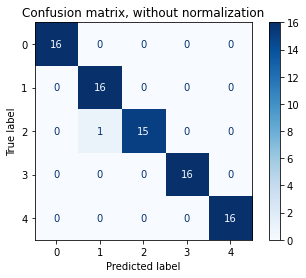

In [4]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state = 42, stratify = y)

from sklearn.model_selection import GridSearchCV
params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma': [0.0001, 0.001, 0.01, 0.1],
          'kernel':['linear','rbf', 'poly', 'sigmoid'] }

grid = GridSearchCV(SVC(), params_grid, refit=True)
grid.fit(X_train, y_train)
print (grid.best_params_)
grid_predictions = grid.predict(X_test) 
print(classification_report(y_test, grid_predictions)) 
print("Accuracy:",metrics.accuracy_score(y_test, grid_predictions))
plot_matrix(grid)

{'n_neighbors': 3}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        16
           3       0.94      1.00      0.97        16
           4       1.00      0.94      0.97        16

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80

Accuracy: 0.975


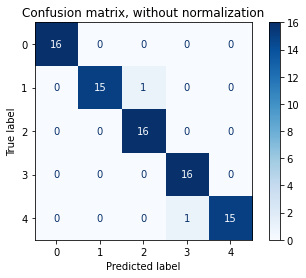

In [5]:
params = {
        'n_neighbors': [3, 5, 7, 9, 11, 13, 17, 19, 23,25, 27, 29, 31, 33,35, 37, 39 ] # usually odd numbers
        }
grid = GridSearchCV(KNeighborsClassifier(),           
                      params, refit=True
                     )

grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)
print (grid.best_params_)
print(classification_report(y_test, grid_predictions)) 
score = metrics.accuracy_score(y_test, grid_predictions)
print("Accuracy:",score)
plot_matrix(grid)



{'max_features': 'auto', 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        16

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy: 1.0


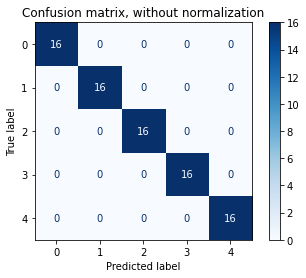

In [6]:
param_grid = {
    'n_estimators': [100, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(RandomForestClassifier(), param_grid,  refit=True, n_jobs=-1)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)
print (grid.best_params_)
print(classification_report(y_test, grid_predictions)) 
print("Accuracy:",metrics.accuracy_score(y_test, grid_predictions))
plot_matrix(grid)

